In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path='/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
dataset =pd.read_csv(path)

In [3]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=40) 

In [5]:
X_test.shape, y_test.shape

((1525, 1428), (1525,))

In [6]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([616, 909]))

# Grid search

In [7]:
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 10, 20, 100, 1000], 'gamma': [0.01, 0.0014005602240896359, 0.0007002801120448179]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [9]:
# # Average Scores
# #  print clf.cv_results_
# # clf.best_estimator_
# # np.mean
# scores=clf.cv_results_['mean_test_score']
# print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

In [10]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.880655737704918
support: 61.3479829452


In [11]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[518,  98],
       [ 84, 825]])

In [12]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.86      0.84      0.85       616
        1.0       0.89      0.91      0.90       909

avg / total       0.88      0.88      0.88      1525



In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8742499249924993

In [14]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.000700280112045,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

# Bayesian Optimization

In [16]:
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1,10*.65],'gamma':[0.1,10**-3.20]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8826229508196721
             precision    recall  f1-score   support

        0.0       0.86      0.85      0.85       616
        1.0       0.90      0.90      0.90       909

avg / total       0.88      0.88      0.88      1525



In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8777315231523152

In [18]:
clf.best_estimator_

SVC(C=6.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00063095734448,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.8826229508196721
support: 59.1341423418


In [20]:
# pred=clf.best_estimator_.predict(X_test)
# clf.score(X_test, y_test)  
# # print pred
# # print y_test

In [21]:
# k=0;j=68;
# for i in range(0,21):
#     print k,j
#     k=k+68;j=j+68;

In [22]:
k=0;j=68; acgw=[];
for i in range(0,21):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    print acc
    print k,j
    k=k+68;j=j+68;

0.7672131147540984
0 68
0.7724590163934426
68 136
0.7757377049180327
136 204
0.779672131147541
204 272
0.7711475409836066
272 340
0.7868852459016393
340 408
0.7901639344262295
408 476
0.7711475409836066
476 544
0.7639344262295082
544 612
0.7659016393442623
612 680
0.7468852459016393
680 748
0.7737704918032787
748 816
0.7540983606557377
816 884
0.7685245901639344
884 952
0.7763934426229508
952 1020
0.7580327868852459
1020 1088
0.7488524590163934
1088 1156
0.779672131147541
1156 1224
0.7770491803278688
1224 1292
0.7718032786885246
1292 1360
0.7731147540983606
1360 1428


In [23]:
clf.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00140056022409,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
yr=X_test[:,0:68]
yr.shape

(1525, 68)

In [25]:
dataset
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
# Xc

In [26]:
X.shape

(7623, 1428)

# Hemisphere

In [27]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=40) 
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8478688524590164
             precision    recall  f1-score   support

        0.0       0.80      0.84      0.82       616
        1.0       0.89      0.86      0.87       909

avg / total       0.85      0.85      0.85      1525



In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8459622747989085

In [29]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.8478688524590164
support: 52.7222040013


In [30]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.000700280112045,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
k=0;j=34; acgr=[];
for i in range(0,21):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    print acc
    print k,j
    k=k+34;j=j+34;

0.7180327868852459
0 34
0.7173770491803279
34 68
0.76
68 102
0.7383606557377049
102 136
0.7298360655737705
136 170
0.7534426229508197
170 204
0.7481967213114754
204 238
0.7331147540983607
238 272
0.7363934426229508
272 306
0.718688524590164
306 340
0.7160655737704918
340 374
0.7180327868852459
374 408
0.7232786885245902
408 442
0.7272131147540983
442 476
0.7101639344262295
476 510
0.719344262295082
510 544
0.7180327868852459
544 578
0.7272131147540983
578 612
0.740327868852459
612 646
0.7324590163934426
646 680
0.7390163934426229
680 714


# LH

In [32]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=40) 
cv=5
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8747540983606558
             precision    recall  f1-score   support

        0.0       0.85      0.84      0.84       616
        1.0       0.89      0.90      0.90       909

avg / total       0.87      0.87      0.87      1525



In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8687761633306188

In [34]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.8747540983606558
support: 63.1354542473


In [35]:
# acg=[];
# for i in range(0,6,2):
#     acg=np.append(acg,i)

In [36]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00140056022409,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
k=0;j=34; acgl=[];
for i in range(0,21):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    print acc
    print k,j
    k=k+34;j=j+34;

0.7377049180327869
0 34
0.7436065573770492
34 68
0.7462295081967213
68 102
0.7396721311475409
102 136
0.7357377049180328
136 170
0.7586885245901639
170 204
0.7554098360655738
204 238
0.7324590163934426
238 272
0.7259016393442623
272 306
0.7337704918032787
306 340
0.7219672131147541
340 374
0.7704918032786885
374 408
0.7363934426229508
408 442
0.7350819672131148
442 476
0.7514754098360655
476 510
0.7206557377049181
510 544
0.7272131147540983
544 578
0.7580327868852459
578 612
0.7377049180327869
612 646
0.7455737704918033
646 680
0.7318032786885246
680 714


In [38]:
t=np.linspace(0,200,21, endpoint=True)
time=pd.DataFrame(t)
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [39]:
a

,time,Whole,LH,RH
,0,0,0,0
0,0.0,0.767213,0.737705,0.718033
1,10.0,0.772459,0.743607,0.717377
2,20.0,0.775738,0.746230,0.760000
3,30.0,0.779672,0.739672,0.738361
4,40.0,0.771148,0.735738,0.729836
5,50.0,0.786885,0.758689,0.753443
6,60.0,0.790164,0.755410,0.748197
7,70.0,0.771148,0.732459,0.733115
8,80.0,0.763934,0.725902,0.736393


In [42]:
wpath="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
dall=a
dall.to_csv(wpath+'svm_res_25sam_10ms_clear.csv')

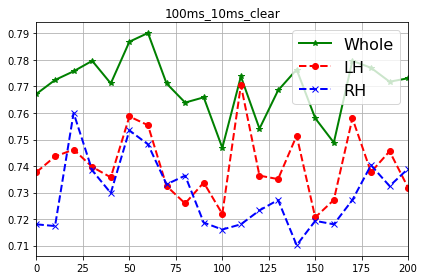

In [40]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("100ms_10ms_clear")
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
# plt.xlabel('Time (ms)',**axis_font)
# plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('Whole brain',**axis_font)
# plt.yticks(**axis_font)
# plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [41]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

50.55755985569039

In [44]:
# dall